In [ ]:
import os
from keras.models import Sequential
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import np_utils
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

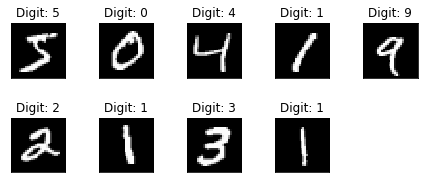

In [21]:
(train_x,train_y), (test_x, test_y) = mnist.load_data()
fig1 = plt.figure() 
for i in range(9):  
    plt.subplot(3,5,i+1)
    plt.yticks([])
    plt.xticks([])
    plt.imshow(train_x[i], cmap='Blues_r', interpolation='none')
    plt.tight_layout()
    plt.title("Digit is: {}".format(train_y[i]))
    fig1  

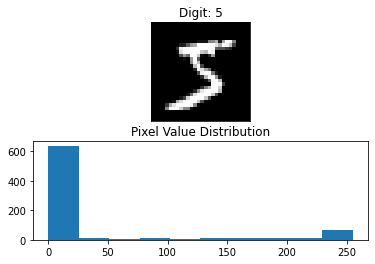

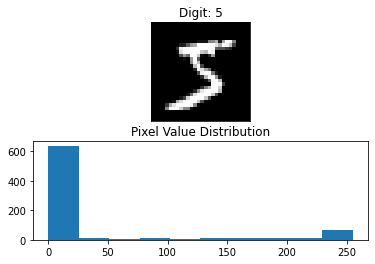

In [ ]:
fig1 = plt.figure()
plt.subplot(2,1,1)
plt.imshow(train_x[0], cmap='Blues_r', interpolation='none')
plt.yticks([])
plt.xticks([])
plt.title("Digit is: {}".format(train_y[0]))
plt.subplot(2,1,2)
plt.hist(train_x[0].reshape(784))
plt.title("sample Value")
fig1

In [ ]:
train_x = train_x.reshape(60000, 784)
test_x = test_x.reshape(10000, 784)
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x /= 255
test_x /= 255
print("shape train matrix", train_x.shape)
print("shape Test matrix", test_x.shape)
print(np.unique(train_y, return_counts=True))

n_classes = 10
print("Shape before encode: ", train_y.shape)
train_y = np_utils.to_categorical(train_y, n_classes)
test_y = np_utils.to_categorical(test_y, n_classes)
print("Shape after encode: ", train_y.shape)
print("after encode", train_y[0]) 

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
The label 5 after one-hot encoding [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
model = Sequential()

model.add(Dense(256, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.1))

model.add(Dense(512))
model.add(Activation('relu')) 
model.add(Dropout(0.15)) 

model.add(Dense(10)) 
model.add(Activation('softmax'))  
model.compile( metrics=['acc'],loss='categorical_crossentropy', optimizer='adam')
history = model.fit(train_x, train_y,verbose=2,epochs=20, batch_size=128, validation_data=(test_x, test_y))

Model Compiled


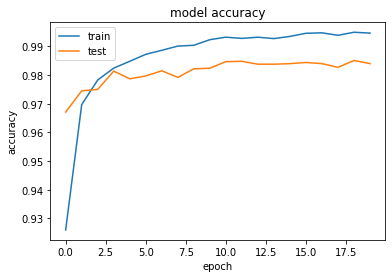

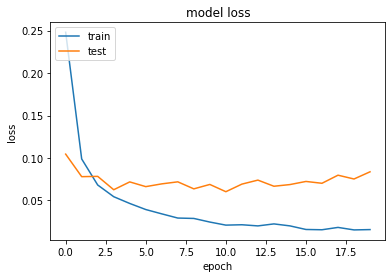

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()